## Importing the dependencies

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

## Load the data

In [240]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Date,Passengers
0,2008-01-01,112
1,2008-02-01,118
2,2008-03-01,132
3,2008-04-01,129
4,2008-05-01,121


## Convert the Date (time series) to days ago (integer)

In [241]:
train['Date'] = pd.to_datetime(train['Date'])
train['Days ago'] = (dt.now() - train['Date']).dt.days
train

,Date,Passengers,Days ago
0,2008-01-01,112,5870
1,2008-02-01,118,5839
2,2008-03-01,132,5810
3,2008-04-01,129,5779
4,2008-05-01,121,5749
...,...,...,...
119,2017-12-01,337,2248
120,2018-01-01,360,2217
121,2018-02-01,342,2186
122,2018-03-01,406,2158


## Analyzing the data patterns
Because the training data has a linear trend, we chose to use the Linear Regression model.

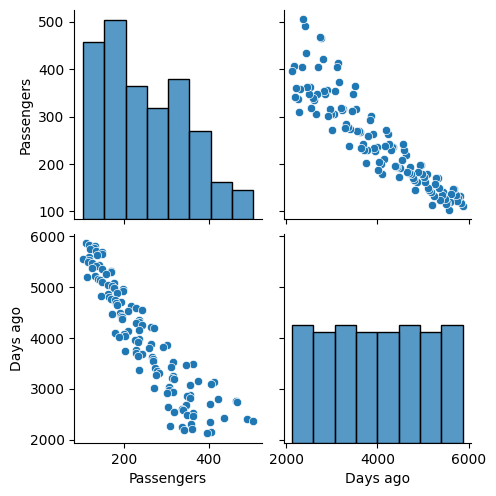

In [242]:
sns.pairplot(train)

## Utility Functions

In [243]:
def visualize_scatter_plot(X, y):
    plt.scatter(X, y, color="red", label="Data Points")
    plt.legend()
    plt.xlabel("Days from now")
    plt.ylabel("Passengers")
    plt.show()

In [244]:
def train_test_split(X, y, test_size=.2, random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0] * test_size)
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test  = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, y_train, X_test, y_test

## Cleaning the outliers

In [245]:
train = train.drop(['Date'], axis=1)

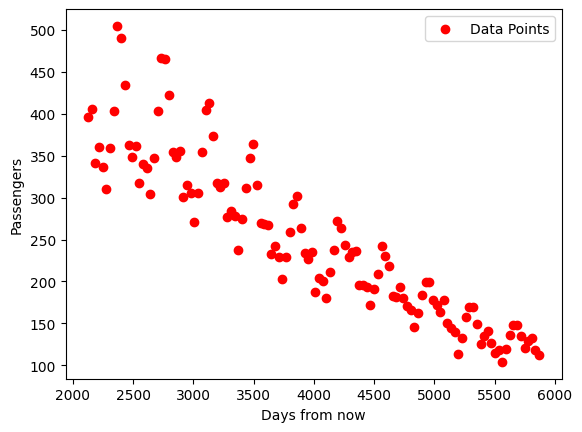

In [246]:
visualize_scatter_plot(train['Days ago'], train['Passengers'])

In [247]:
cleaned_train = train[(np.abs(stats.zscore(train)) < 1.5).all(axis=1)]

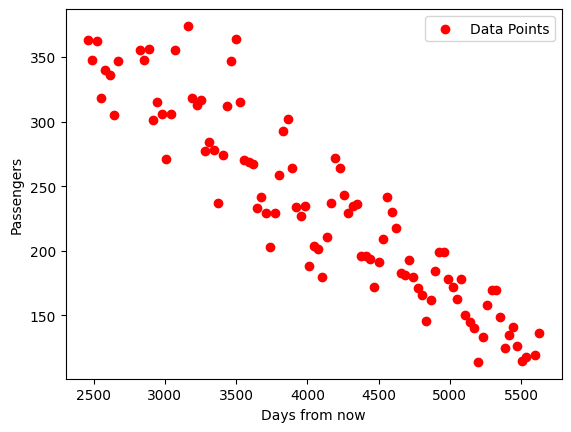

In [248]:
visualize_scatter_plot(cleaned_train['Days ago'], cleaned_train['Passengers'])

## Creating the Linear Regression model

In [249]:
class LinearRegression:
    def __init__(self) -> None:
        self.m = None
        self.c = None

    def fit(self, X_train, y_train):
        mean_X = np.mean(X_train)
        mean_y = np.mean(y_train)
        
        numerator = np.sum((X_train - mean_X) * (y_train - mean_y))
        denominator = np.sum((X_train - mean_X) ** 2)
        self.m = numerator / denominator
        self.c = mean_y - (self.m * mean_X)
    
    def predict(self, X):
        # formula: y = c + mx
        predictions: np.ndarray = self.c + self.m * X
        return predictions.astype(np.int32)
    
    def mean_absolute_percentage_error(self, y_pred, y_true):
        mape = np.mean(np.abs((y_true - y_pred) / y_true))
        return mape * 100 # Get the percentage

## Initialize the model

In [250]:
model = LinearRegression()

## Training the model

In [251]:
X_train = np.asarray(cleaned_train['Days ago'].values.tolist())
y_train = np.asarray(cleaned_train['Passengers'].values.tolist())

In [252]:
model.fit(X_train, y_train)

## Testing the model

In [253]:
test = pd.read_csv('./datasets/test.csv')

In [254]:
# Converting the time series variable to integer (days from today)
test['Date'] = pd.to_datetime(test['Date'])
test['Days ago'] = (dt.now() - test['Date']).dt.days

In [255]:
X_test = np.asarray(test['Days ago'].values.tolist())
X_test

array([2097, 2066, 2036, 2005, 1974, 1944, 1913, 1883, 1852, 1821, 1793,
       1762, 1732, 1701, 1671, 1640, 1609, 1579, 1548, 1518])

In [256]:
# Printing the predictions values
predictions = model.predict(X_test)
predictions

array([384, 386, 388, 391, 393, 395, 398, 400, 402, 404, 407, 409, 411,
       413, 416, 418, 420, 423, 425, 427])

## VIsualizing with Scatter Plot

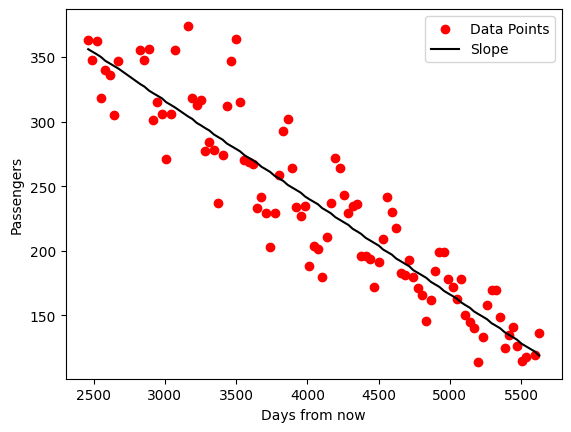

In [257]:
# Visualizing the model predictions
plt.scatter(X_train, y_train, color="red", label="Data Points")
plt.plot(X_train, model.predict(X_train), color="black", label="Slope")
plt.legend()
plt.xlabel("Days from now")
plt.ylabel("Passengers")
plt.show()

## Evaluating the model

In [258]:
# Printing the MAPE
eval_X_train, eval_y_train, eval_X_test, eval_y_test = train_test_split(X_train, y_train, random_state=1000)

eval_model = LinearRegression()
eval_model.fit(eval_X_train, eval_y_train)
eval_predictions = eval_model.predict(eval_X_test)

mape = eval_model.mean_absolute_percentage_error(eval_y_test, eval_predictions)
print(f"The MAPE: {mape:.3f}%")

The MAPE: 9.218%


## Writing the predictions to Submission file

In [259]:
submission = pd.DataFrame({'Date': test['Date'].values, 'Passengers': predictions})
submission.to_csv("submission.csv")
print("Successfully written the predictions to submission.csv")

Successfully written the predictions to submission.csv
